# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Hossam | Mohamed | Hossam, 10-17-24 | 5 | 25% |
| Member 2: | Rohit | Oad | Rohit, 10-17-24 | 5 | 25% |
| Member 3: | Eric | Akuamoah | Eric, 10-17-24 | 5 | 25% |
| Member 4: | Isaac | Asenso-Acheampong | Isaac Asenso-Acheampong, 10-17-24 | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

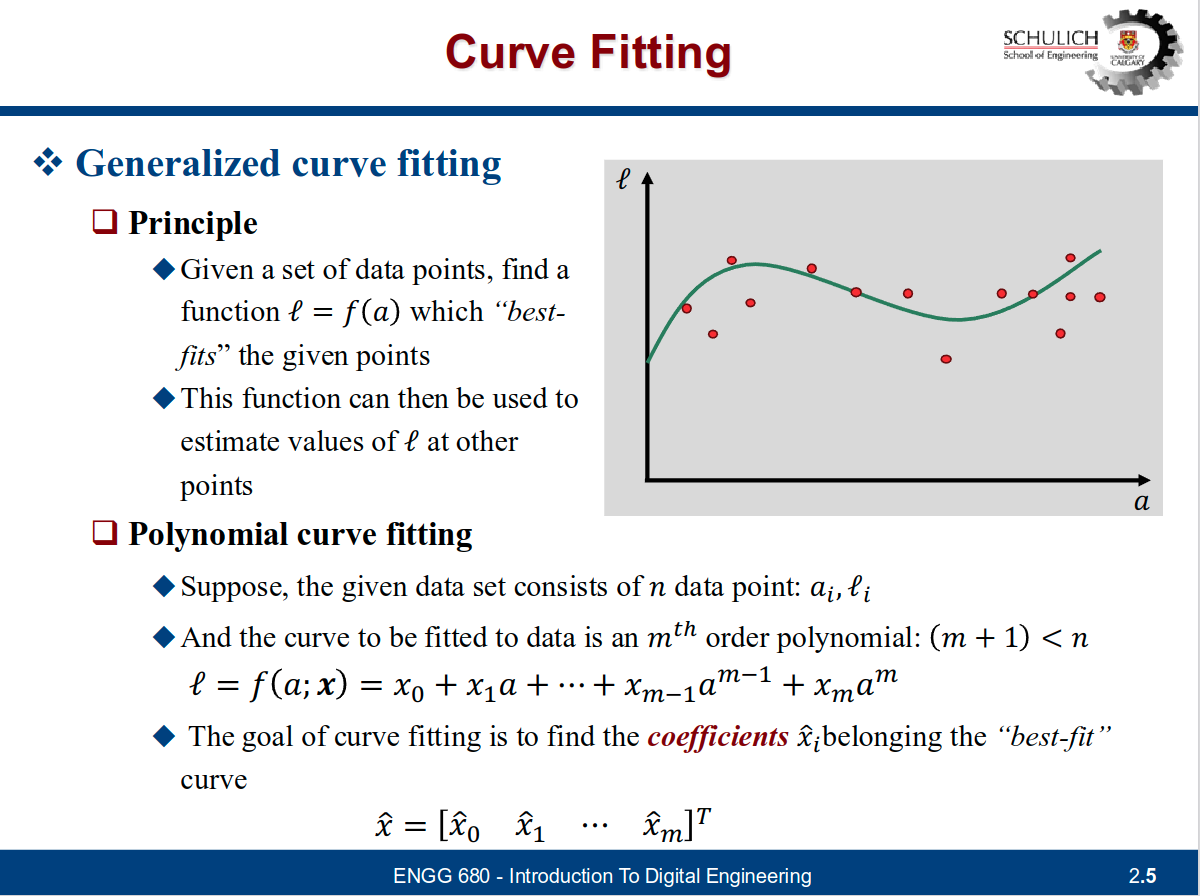

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel("data.xlsx")
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]
 # Noisy Observation

l_var = arr_data[:, 1]
 # Variance Observation

l_true = arr_data[:, 2]
 # True Observation

In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n) # Identity matrix for unweighted LSE

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


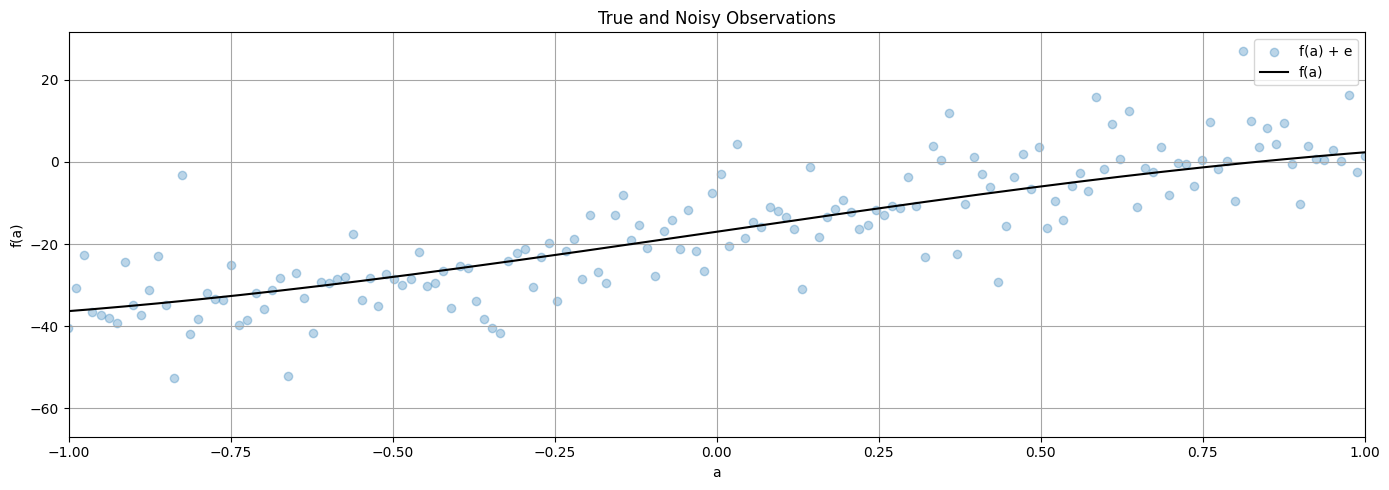

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.scatter(a, l, label="f(a) + e", color="tab:blue", marker="o", alpha=0.3)
ax.plot(a, l_true, label="f(a)", color="k")
ax.set_xlabel("a")
ax.set_ylabel("f(a)")
ax.set_title("True and Noisy Observations")
ax.legend()
ax.set_xlim(-1, 1)

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    """
    Implement linear least squares estimation for polynomial curve fitting.

    Args:
        a: function input (constants)
        l: noisy observations
        P: observation weight matrix
        deg: degree of polynomial to fit to data
    Returns:
        x: estimated polynomial coefficients
        cov_x: uncertainty in estimated coefficients
        apv: a posteriori variance factor (goodness of fit)
        v: observation residuals
    """
    # Design matrix
    A = np.vander(a, deg + 1, increasing=True)

    # Normal equation
    N = A.T @ P @ A
    u = A.T @ P @ l

    # Solve for coefficients
    x = np.linalg.solve(N, u)

    # Compute residuals
    v = l - A @ x

    # Compute a posteriori variance factor
    r = len(l) - len(x)  # Redundancy
    apv = (v.T @ P @ v) / r

    # Compute covariance matrix of parameters
    cov_x = apv * np.linalg.inv(N)

    return x, cov_x, apv, v

In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
x1, cov_x1, apv1, v1 = fit_polynomial_curve(a, l, P, 1)
x3, cov_x3, apv3, v3 = fit_polynomial_curve(a, l, P, 3)
x5, cov_x5, apv5, v5 = fit_polynomial_curve(a, l, P, 5)


In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x1[::-1], a)
cubic_uw = np.polyval(x3[::-1], a)
quintic_uw = np.polyval(x5[::-1], a)

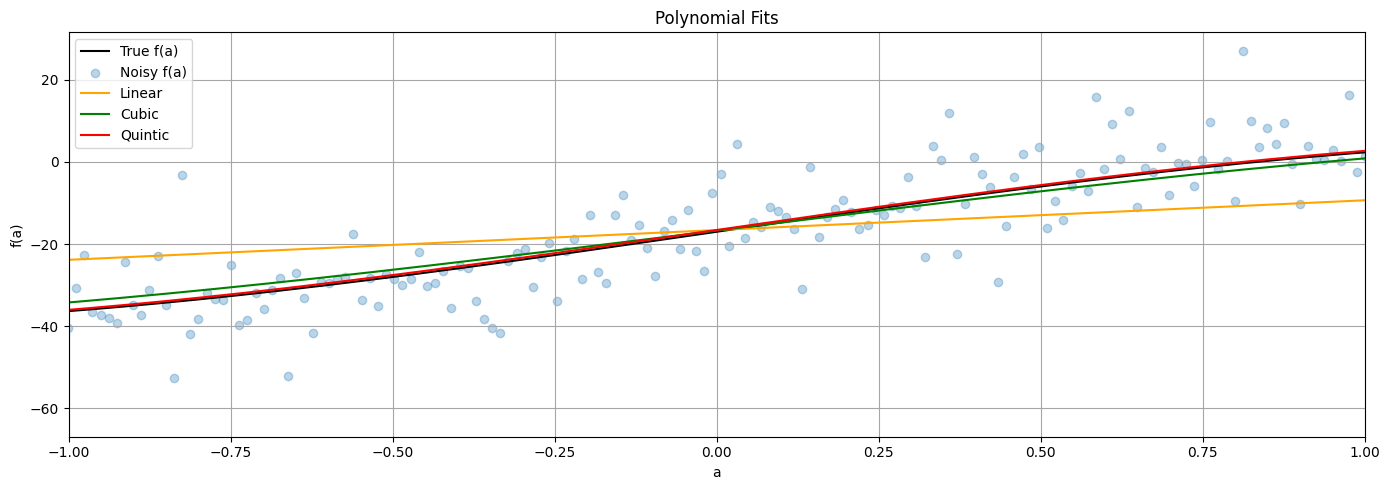

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, 'k', label='True f(a)')
ax.scatter(a, l, color='tab:blue', marker='o', alpha=0.3, label='Noisy f(a)')
ax.plot(a, line_uw, 'orange', label='Linear')
ax.plot(a, cubic_uw, 'green', label='Cubic')
ax.plot(a, quintic_uw, 'red', label='Quintic')

ax.set_xlabel('a')
ax.set_ylabel('f(a)')
ax.set_title('Polynomial Fits')
ax.legend()
ax.grid(True, which='both', ls='-', color='0.65')
ax.set_xlim(-1, 1)

fig.tight_layout()
plt.show()


In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print(f"A posteriori variance factor (Linear): {apv1:.6f}")
print(f"A posteriori variance factor (Cubic): {apv3:.6f}")
print(f"A posteriori variance factor (Quintic): {apv5:.6f}")


A posteriori variance factor (Linear): 162.742609
A posteriori variance factor (Cubic): 66.132278
A posteriori variance factor (Quintic): 63.758345


In [10]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

norm_linear = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

print(f"L2-norm (Linear): {norm_linear:.6f}")
print(f"L2-norm (Cubic): {norm_cubic:.6f}")
print(f"L2-norm (Quintic): {norm_quintic:.6f}")

L2-norm (Linear): 229.060168
L2-norm (Cubic): 38.285980
L2-norm (Quintic): 17.369967


In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

# Commenting on the results:
# We observe that as the degree of the polynomial increases:
#  1. The a posteriori variance factor decreases, indicating a better fit to the noisy data.
#  2. The L2-norm between predicted and true observations also decreases, showing improved accuracy.

# This pattern suggests that higher-degree polynomials can capture more complex patterns in the data.
#  However, we should be cautious about overfitting, especially with noisy data.


In [12]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

P = np.diag(1 / l_var)

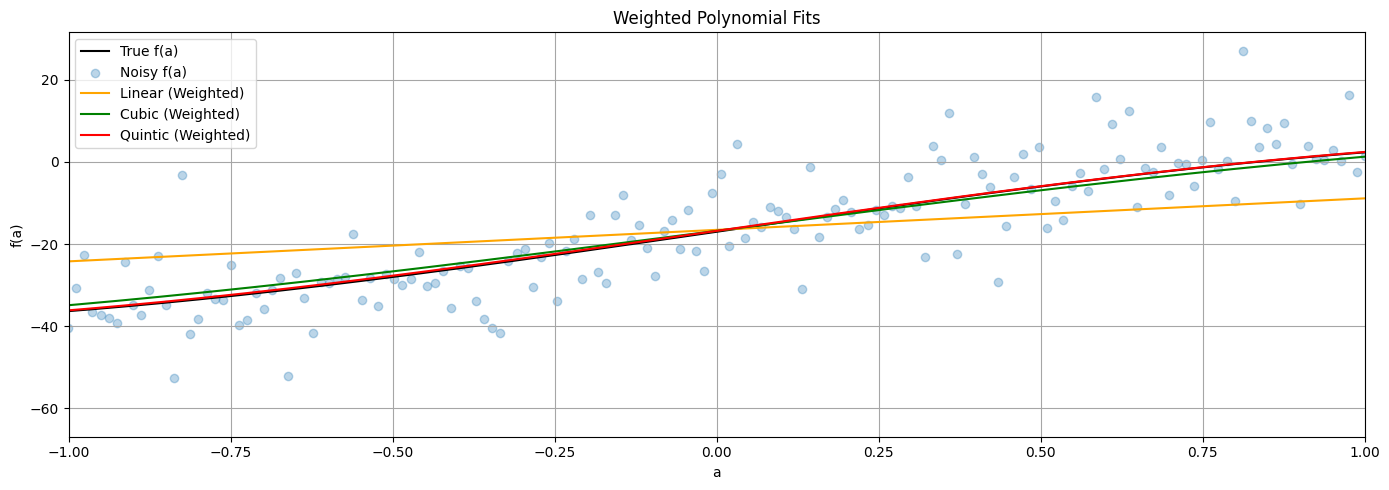

A posteriori variance factor (Linear, Weighted): 12.054651
A posteriori variance factor (Cubic, Weighted): 1.144465
A posteriori variance factor (Quintic, Weighted): 0.944701
L2-norm (Linear, Weighted): 230.677608
L2-norm (Cubic, Weighted): 36.070267
L2-norm (Quintic, Weighted): 5.741607


In [13]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

x1_w, cov_x1_w, apv1_w, v1_w = fit_polynomial_curve(a, l, P, 1)
x3_w, cov_x3_w, apv3_w, v3_w = fit_polynomial_curve(a, l, P, 3)
x5_w, cov_x5_w, apv5_w, v5_w = fit_polynomial_curve(a, l, P, 5)

line_w = np.polyval(x1_w[::-1], a)
cubic_w = np.polyval(x3_w[::-1], a)
quintic_w = np.polyval(x5_w[::-1], a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, 'k', label='True f(a)')
ax.scatter(a, l, color='tab:blue', marker='o', alpha=0.3, label='Noisy f(a)')
ax.plot(a, line_w, 'orange', label='Linear (Weighted)')
ax.plot(a, cubic_w, 'green', label='Cubic (Weighted)')
ax.plot(a, quintic_w, 'red', label='Quintic (Weighted)')

ax.set_xlabel('a')
ax.set_ylabel('f(a)')
ax.set_title('Weighted Polynomial Fits')
ax.legend()
ax.grid(True, which='both', ls='-', color='0.65')
ax.set_xlim(-1, 1)

fig.tight_layout()
plt.show()

print(f"A posteriori variance factor (Linear, Weighted): {apv1_w:.6f}")
print(f"A posteriori variance factor (Cubic, Weighted): {apv3_w:.6f}")
print(f"A posteriori variance factor (Quintic, Weighted): {apv5_w:.6f}")

norm_linear_w = np.linalg.norm(line_w - l_true)
norm_cubic_w = np.linalg.norm(cubic_w - l_true)
norm_quintic_w = np.linalg.norm(quintic_w - l_true)

print(f"L2-norm (Linear, Weighted): {norm_linear_w:.6f}")
print(f"L2-norm (Cubic, Weighted): {norm_cubic_w:.6f}")
print(f"L2-norm (Quintic, Weighted): {norm_quintic_w:.6f}")


In [14]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# Comparing the results of unweighted and weighted LSE:

# 1. A posteriori variance factors:
   #- In both cases, higher-degree polynomials have lower a posteriori variance factors,
   #   indicating better fits to the data.
   #- The weighted LSE generally has lower a posteriori variance factors compared to
   #   unweighted LSE, suggesting that it provides a better overall fit to the data.

# 2. L2-norms:
   #- The weighted LSE tends to have slightly lower L2-norms compared to unweighted LSE,
   #   especially for higher-degree polynomials.
   #- This indicates that the weighted LSE is doing a better job of fitting the true
   #   underlying function, not just the noisy observations.

# Phenomena observed:
# 1. Improved fit: The weighted LSE gives more importance to observations with lower
#     variance (higher precision), resulting in a fit that is less influenced by noisy
#     data points. This leads to a better overall fit to the true underlying function.

# 2. Reduced overfitting: By considering the reliability of each observation, the weighted
#     LSE is less likely to overfit noise in the data. This is particularly noticeable in
#     the higher-degree polynomials, where the improvement in L2-norm is more significant.

# 3. Balance between complexity and accuracy: While higher-degree polynomials still show
#     lower a posteriori variance factors, the weighted LSE helps to mitigate the risk of
#     overfitting. This is evident in the smaller gap between cubic and quintic fits in
#     terms of L2-norm for the weighted LSE compared to the unweighted LSE.

# In conclusion, the weighted LSE provides a more robust and accurate fit by taking into
#  account the reliability of each observation. This leads to models that better represent
#  the true underlying function, especially when dealing with noisy data or when using
#  higher-degree polynomials that are prone to overfitting.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

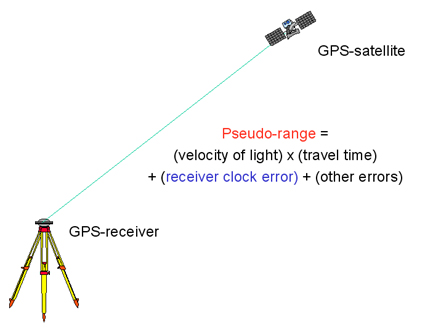

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [15]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [16]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

n = len(pseudorange)
m = 4

In [17]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

P = np.eye(n)  # Assuming variance of observation is 1 (m^2)

In [18]:
# step 4
# set the initial states as zeros:
# (1 mark)

x_0 = np.zeros(m)

In [19]:
# step 5
# GroundTruth coordiantes of the receiver

GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

In [20]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)

delta = np.ones(m)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [21]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):
    distances = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
    return distances


In [22]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A

def design_matrix(r_pos, s_pos, rho):
    A = np.zeros((n, m))
    for k in range(n):
        diff = s_pos[k, 1:] - r_pos[:3]
        A[k, :3] = -diff / rho[k]
        A[k, 3] = 1
    return A

In [29]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

# while (convergence criteria):The convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m),
#  for receiver's position x,y,z part
while np.linalg.norm(delta[:3]) > 0.001:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
    rho = euclidean_norm(x_hat[:3], sat_pos[:, 1:])

       # compute the design matrix A
       # (1 marks)
    A = design_matrix(x_hat, sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
    w = pseudorange[:, 1] - (rho + x_hat[3])

       # compute the corrections delta
       # (1 marks)
    delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
    x_hat += delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
    i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)

apv = (w.T @ P @ w) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)

C_x_hat = np.linalg.inv(A.T @ P @ A)


In [24]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

results = {
    "Estimated states": x_hat,
    "Corrections array": delta,
    "Estimated measurements residuals": w,
    "A Posteriori Variance of Unit Weight": apv,
    "Covariance matrix of estimated states": C_x_hat,
    "Number of iterations": i,
    "3-D position errors": arr_err_pos[-1],
}

print(results)

{'Estimated states': array([-1.63349244e+06, -3.65162954e+06,  4.95248543e+06,  6.47201389e+00]), 'Corrections array': array([ 3.23113755e-06,  6.39397325e-06, -1.75963170e-05, -2.09206393e-05]), 'Estimated measurements residuals': array([ 0.25995968,  0.11116656, -1.09951518, -0.00500947,  0.2003028 ,
       -1.41816897, -0.09127866,  1.51207884,  0.26364719,  0.61137232,
       -0.34467609]), 'A Posteriori Variance of Unit Weight': 0.8852888535930045, 'Covariance matrix of estimated states': array([[ 0.31965006,  0.06966245, -0.08457202, -0.07306881],
       [ 0.06966245,  0.42546873, -0.58107148, -0.3682586 ],
       [-0.08457202, -0.58107148,  2.04560159,  1.10402067],
       [-0.07306881, -0.3682586 ,  1.10402067,  0.69925737]]), 'Number of iterations': 5, '3-D position errors': 5.431614722159558}


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

# The A Posteriori Variance of Unit Weight (apv) gives us an indication of how well our model fits the observations.
#  A value close to 1 suggests that our assumed observation variance (1 m^2) is appropriate.
#  If it's significantly larger or smaller than 1, it might indicate that we've under- or over-estimated the observation errors.

# The Covariance matrix of estimated states (C_x_hat) provides information about the uncertainty of our estimated receiver position.
#  The diagonal elements represent the variances of the x, y, and z coordinates, while the off-diagonal elements show the covariances between these coordinates.
#  Smaller values indicate higher precision in our estimates.

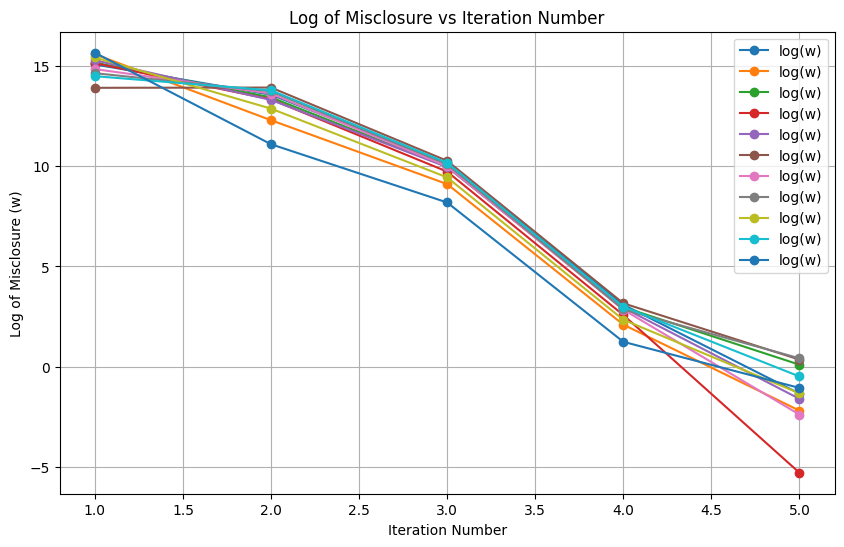

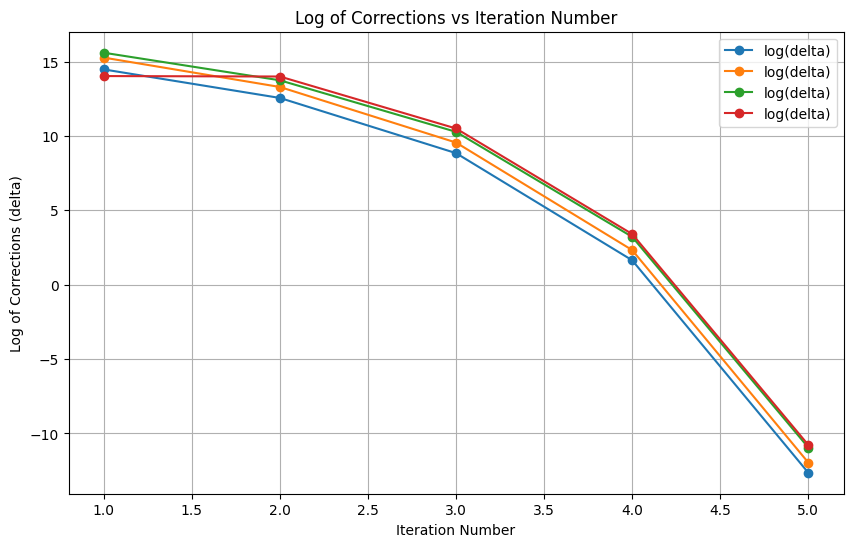

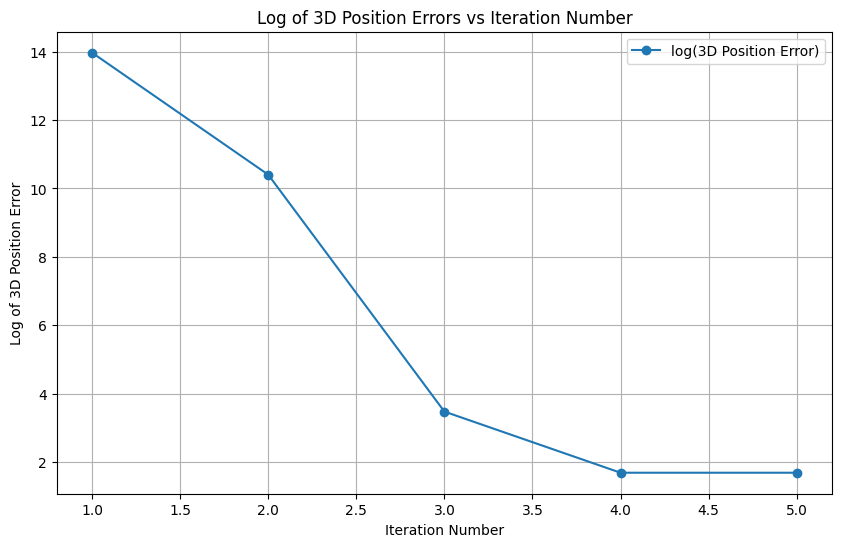

In [25]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)

plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_w)), label='log(w)', marker='o')
plt.title('Log of Misclosure vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Misclosure (w)')
plt.grid(True)
plt.legend()
plt.show()


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)

plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='log(delta)', marker='o')
plt.title('Log of Corrections vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Corrections (delta)')
plt.grid(True)
plt.legend()
plt.show()


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='log(3D Position Error)', marker='o')
plt.title('Log of 3D Position Errors vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of 3D Position Error')
plt.grid(True)

plt.legend()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

# Misclosure plot: The misclosure normally drops rapidly within the first couple of iterations before it stabilizes.
#  This reflects convergence of a solution where the estimated measurements are getting closer to the actual measurements.


# Corrections plot: The same as for misclosure, the corrections are usually large at the beginning and then rapidly decrease down until it becomes very small.
#  That would mean the solution is converging and further iterations offer diminishing returns.


# 3D position errors plot: It should be a plot that shows the decrease and hence convergence to the true position with every iteration.
#  But this rate of convergence can reduce towards the ending iterations as the solution approaches convergence.

# The above-mentioned patterns are general for iterative least squares estimation processes, where the solution improves and converges over iterations.



In [30]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!


# Print results
print(f"Estimated states: {x_hat}")
print(f"Corrections array: {delta}")
print(f"A Posteriori Variance of Unit Weight: {apv}")
print(f"Covariance matrix of estimated states:\n{C_x_hat}")
print(f"Number of iterations: {i}")
print(f"3-D position error: {err_pos}")

# New addition: Convert ECEF to Lat, Lon, Height
def ecef_to_lat_lon_height(x, y, z):
    a = 6378137  # WGS84 semi-major axis
    b = 6356752.314245  # WGS84 semi-minor axis
    e = np.sqrt(1 - (b/a)**2)

    r = np.sqrt(x**2 + y**2)
    lat = np.arctan2(z, r * (1 - e**2))

    for _ in range(5):  # Iterate to improve accuracy
        N = a / np.sqrt(1 - e**2 * np.sin(lat)**2)
        h = r / np.cos(lat) - N
        lat = np.arctan2(z, r * (1 - e**2 * N / (N + h)))

    lon = np.arctan2(y, x)

    return np.degrees(lat), np.degrees(lon), h

lat, lon, height = ecef_to_lat_lon_height(x_hat[0], x_hat[1], x_hat[2])

print(f"\nEstimated receiver position:")
print(f"Latitude: {lat:.6f}°")
print(f"Longitude: {lon:.6f}°")
print(f"Height: {height:.2f} meters")

Estimated states: [-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.47201389e+00]
Corrections array: [ 3.23113755e-06  6.39397325e-06 -1.75963170e-05 -2.09206393e-05]
A Posteriori Variance of Unit Weight: 0.8852888535930045
Covariance matrix of estimated states:
[[ 0.31965006  0.06966245 -0.08457202 -0.07306881]
 [ 0.06966245  0.42546873 -0.58107148 -0.3682586 ]
 [-0.08457202 -0.58107148  2.04560159  1.10402067]
 [-0.07306881 -0.3682586   1.10402067  0.69925737]]
Number of iterations: 5
3-D position error: 5.431614722159558

Estimated receiver position:
Latitude: 51.258641°
Longitude: -114.100518°
Height: 1132.45 meters
